<h1> RSNA 2022 Cervical Spine Fracture Detection </h1>

---

In [ ]:
#@title
from IPython.display import Video, Image, HTML, display

image_path1 = "https://innerbody.imgix.net/cervical_vertebrae.png"
image_path2 = "https://upload.wikimedia.org/wikipedia/commons/thumb/c/cf/Cervical_Spine_Anterior_View.png/1024px-Cervical_Spine_Anterior_View.png"
image_path3 = "https://o.quizlet.com/37toD9uBRyPe.O9dczpY5A_b.jpg"


HTML(f"""
    <div class="row" style="display: flex;">
            <img src={image_path1} style="height:300px; margin: auto;"> </img>
            <img src={image_path2} style="height:300px; margin: auto;"> </img>
            <img src={image_path3} style="height:300px; margin: auto;"> </img>

    </div>
    """)

---

<h1> Table of Contents </h1>

>[1 Introduction](#updateTitle=true&folderId=1EKF_3rqNbEcDMSevUKbru8-1wvuJV5Mk&scrollTo=AENFL95Y8odN)

>>[1.1 About This Project](#updateTitle=true&folderId=1EKF_3rqNbEcDMSevUKbru8-1wvuJV5Mk&scrollTo=mSxKmAy18oWJ)

>>[1.2 About the Dataset](#updateTitle=true&folderId=1EKF_3rqNbEcDMSevUKbru8-1wvuJV5Mk&scrollTo=2szP8O5B9QMP)

>>[1.3 About This Notebook](#updateTitle=true&folderId=1EKF_3rqNbEcDMSevUKbru8-1wvuJV5Mk&scrollTo=fxYFgcah9QE2)

>[2 Data Overview](#updateTitle=true&folderId=1EKF_3rqNbEcDMSevUKbru8-1wvuJV5Mk&scrollTo=hLN3QZye9P87)



---

# 1 Introduction

- Every year, around the world, between **250 000** and **500 000** people suffer a spinal cord injury (SCI).

- The majority of spinal cord injuries are due to preventable causes such as road traffic crashes, falls or violence.

- People with a spinal cord injury are **two** to **five** times more likely to die prematurely than people without a spinal cord injury, with worse survival rates in low- and middle-income countries.

- Spinal cord injury is associated with lower rates of school enrollment and economic participation, and it carries substantial individual and societal costs.

- Spinal cord injury is associated with a risk of developing secondary conditions that can be debilitating and even life-threatening—e.g. deep vein thrombosis, urinary tract infections, muscle spasms, osteoporosis, pressure ulcers, chronic pain, and respiratory complications. Acute care, rehabilitation services and ongoing health maintenance are essential for prevention and management of these conditions.

---
**Spinal Cord Scans**

Because scans rely on precision for creating sharp results, any movement can produce blurred results. You must carefully control your breathing as directed during the procedure. If you need images of a part of the body not in your thoracic region, you may be freer with your breath, but you will need to remain completely still for the scan. So it is hard to sustain reliable results by bare eye.it needs a professional Radiologists ot get such data.

## 1.1 About This Project

In this project we will look closely into how to detect cervical spine fractures
with a deep learing model to help diagnose victims faster to avoid permanent injuries or death.

Finally, we use deep learing models in order to automate cervical spine fracture detection. 

An immediate application on this is early detection of cervical spine fracture in hospitals, thus enabling proactive measurements instead of reactive. Therefore, the goal of the project is to draw statistical insights, and construct a real world application for the dataset.

## 1.2 About the Dataset

The Dataset is collected imaging data sourced from twelve sites on six continents, including approximately 3,000 CT studies. Spine radiology specialists from the ASNR and ASSR provided expert image level annotations these studies to indicate the presence, vertebral level and location of any cervical spine fractures.

## 1.3 About This Notebook

This Notebook is concerned with exploring the data, the cervical spine fracture, and the patterns and insights hidden inside the data. We will visualize the data in various ways in our exploration.

In [ ]:
#@title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as patches
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.6)
import cv2
import os
from os import listdir
import re
import gc
from tqdm import tqdm
from pprint import pprint
from time import time
import itertools
from skimage import measure 
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import nibabel as nib
from glob import glob
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 2 Data Overview <a class="anchor" id="overview"></a>

In [ ]:
#@title
! pip install -q kaggle

In [ ]:
#@title
from google.colab import files

In [ ]:
#@title
files.upload()

In [ ]:
#@title
! mkdir ~/.kaggle

In [ ]:
#@title
! cp kaggle.json ~/.kaggle/

In [ ]:
#@title
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#@title
!kaggle datasets list -s dogs

ref                                                        title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
jessicali9530/stanford-dogs-dataset                        Stanford Dogs Dataset                               750MB  2019-11-13 06:20:35          31284        866  0.75             
shaunthesheep/microsoft-catsvsdogs-dataset                 Cats-vs-Dogs                                        788MB  2020-03-12 05:34:30          15673        233  0.875            
d4rklucif3r/cat-and-dogs                                   Cat & Dogs                                          218MB  2021-06-07 11:39:13           1701         54  0.875            
chetankv/dogs-cats-images                                  Dogs & Cats Images        

In [ ]:
#@title
import os

os.environ['KAGGLE_USERNAME'] = "mohamedsalemmohamed"
os.environ['KAGGLE_KEY'] = "5960caf345fa85c43e6aa91425635ec8"

!kaggle datasets download -d awsaf49/rsna-csfd-256x256-jpg-dataset

100% 16.6G/16.6G [14:00<00:00, 19.3MB/s]
100% 16.6G/16.6G [14:00<00:00, 21.2MB/s]


In [ ]:
#@title
! mkdir train

In [ ]:
#@title
! unzip rsna-csfd-256x256-jpg-dataset.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/train_images/1.2.826.0.1.3680043.4560/275.jpg  
  inflating: train/train_images/1.2.826.0.1.3680043.4560/276.jpg  
  inflating: train/train_images/1.2.826.0.1.3680043.4560/277.jpg  
  inflating: train/train_images/1.2.826.0.1.3680043.4560/278.jpg  
  inflating: train/train_images/1.2.826.0.1.3680043.4560/279.jpg  
  inflating: train/train_images/1.2.826.0.1.3680043.4560/28.jpg  
  inflating: train/train_images/1.2.826.0.1.3680043.4560/280.jpg  
  inflating: train/train_images/1.2.826.0.1.3680043.4560/281.jpg  
  inflating: train/train_images/1.2.826.0.1.3680043.4560/282.jpg  
  inflating: train/train_images/1.2.826.0.1.3680043.4560/283.jpg  
  inflating: train/train_images/1.2.826.0.1.3680043.4560/284.jpg  
  inflating: train/train_images/1.2.826.0.1.3680043.4560/285.jpg  
  inflating: train/train_images/1.2.826.0.1.3680043.4560/286.jpg  
  inflating: train/train_images/1.2.826.0.1.3680043.4560/287.jpg  
  inflating:

In [ ]:
# Load metadata
train_data = pd.read_csv("/content/train/train.csv")
test_data = pd.read_csv("/content/train/test.csv")
ss = pd.read_csv("/content/train/sample_submission.csv")

# Print dataframe shapes
print('train shape:', train_data.shape)
print('test shape:', test_data.shape)
print('ss shape:', ss.shape)

In [ ]:
train_data

In [ ]:
print(train_data.info(), end='\n\n')
print(test_data.info(), end='\n\n')

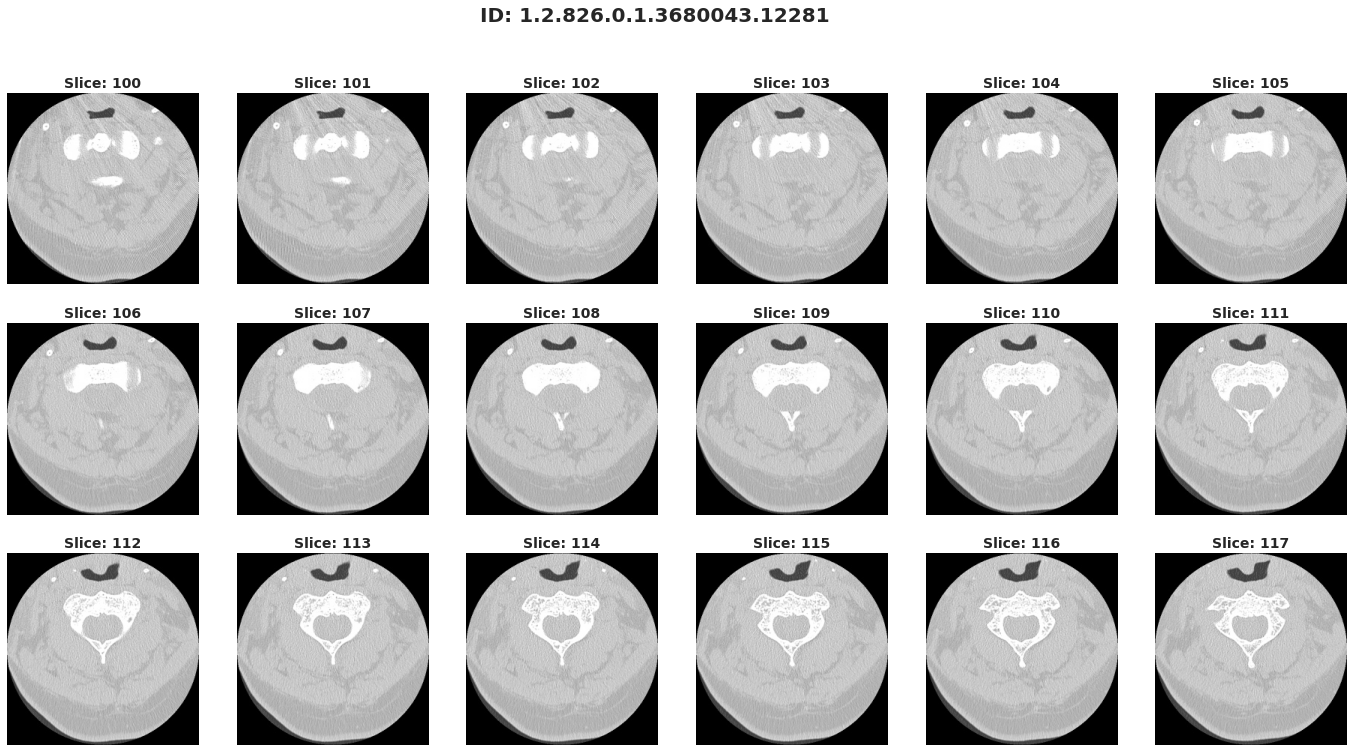

In [ ]:
base_path = "/content/train"
patient_id = '1.2.826.0.1.3680043.12281'
imgs_paths = glob(f"{base_path}/train_images/{patient_id}/*")
def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    return [atoi(c) for c in re.split(r'(\d+)', text)]
imgs_paths.sort(key=natural_keys)

images = [cv2.imread(path) for path in imgs_paths]
# Plot images
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(24,12))
fig.suptitle(f'ID: {patient_id}', weight="bold", size=20)

start = 100
for i in range(start,start+18):
    img = images[i]
    slice_no = i

    # Plot the image
    x = (i-start) // 6
    y = (i-start) % 6

    axes[x, y].imshow(img, cmap="bone")
    axes[x, y].set_title(f"Slice: {slice_no}", fontsize=14, weight='bold')
    axes[x, y].axis('off')

In [ ]:
train_data.set_index('StudyInstanceUID', inplace=True)

In [ ]:
new_train_data = train_data.loc[os.listdir('/content/train/train_images/'),:].reset_index()
new_train_data

StudyInstanceUID  \
0       1.2.826.0.1.3680043.1291   
1       1.2.826.0.1.3680043.1291   
2       1.2.826.0.1.3680043.1291   
3       1.2.826.0.1.3680043.1291   
4       1.2.826.0.1.3680043.1291   
...                          ...   
711596  1.2.826.0.1.3680043.7791   
711597  1.2.826.0.1.3680043.7791   
711598  1.2.826.0.1.3680043.7791   
711599  1.2.826.0.1.3680043.7791   
711600  1.2.826.0.1.3680043.7791   

                                               slice_path  patient_overall  \
0       ../input/rsna-2022-cervical-spine-fracture-det...                0   
1       ../input/rsna-2022-cervical-spine-fracture-det...                0   
2       ../input/rsna-2022-cervical-spine-fracture-det...                0   
3       ../input/rsna-2022-cervical-spine-fracture-det...                0   
4       ../input/rsna-2022-cervical-spine-fracture-det...                0   
...                                                   ...              ...   
711596  ../input/rsna-2022-cervical-spine-fracture-det...                0   
711597  ../input/rsna-2022-cervical-spine-fracture-det...                0   
711598  ../input/rsna-2022-cervical-spine-fracture-det...                0   
711599  ../input/rsna-2022-cervical-spine-fracture-det...                0   
711600  ../input/rsna-2022-cervical-spine-fracture-det...                0   

        C1  C2  C3  C4  C5  C6  C7  slice_id  width  height  
0        0   0   0   0   0   0   0       257    512     512  
1        0   0   0   0   0   0   0       240    512     512  
2        0   0   0   0   0   0   0       317    512     512  
3        0   0   0   0   0   0   0        12    512     512  
4        0   0   0   0   0   0   0       323    512     512  
...     ..  ..  ..  ..  ..  ..  ..       ...    ...     ...  
711596   0   0   0   0   0   0   0        26    512     512  
711597   0   0   0   0   0   0   0       185    512     512  
711598   0   0   0   0   0   0   0       221    512     512  
711599   0   0   0   0   0   0   0        13    512     512  
711600   0   0   0   0   0   0   0       140    512     512  

[711601 rows x 13 columns]

In [ ]:
train_data["slice_path"].replace("../input/rsna-2022-cervical-spine-fracture-detection", "/content/train",inplace=True)
train_data["slice_path"].replace("dcm", "jpg", inplace=True)

In [ ]:
train_data["slice_path"][0]

'../input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.17625/12.dcm'

In [ ]:
train_data.rename(columns = {'slice_path':'imgs_paths'}, inplace = True)

In [ ]:
train_data

imgs_paths  \
StudyInstanceUID                                                               
1.2.826.0.1.3680043.17625  ../input/rsna-2022-cervical-spine-fracture-det...   
1.2.826.0.1.3680043.17625  ../input/rsna-2022-cervical-spine-fracture-det...   
1.2.826.0.1.3680043.17625  ../input/rsna-2022-cervical-spine-fracture-det...   
1.2.826.0.1.3680043.17625  ../input/rsna-2022-cervical-spine-fracture-det...   
1.2.826.0.1.3680043.17625  ../input/rsna-2022-cervical-spine-fracture-det...   
...                                                                      ...   
1.2.826.0.1.3680043.30741  ../input/rsna-2022-cervical-spine-fracture-det...   
1.2.826.0.1.3680043.30741  ../input/rsna-2022-cervical-spine-fracture-det...   
1.2.826.0.1.3680043.30741  ../input/rsna-2022-cervical-spine-fracture-det...   
1.2.826.0.1.3680043.30741  ../input/rsna-2022-cervical-spine-fracture-det...   
1.2.826.0.1.3680043.30741  ../input/rsna-2022-cervical-spine-fracture-det...   

                           patient_overall  C1  C2  C3  C4  C5  C6  C7  \
StudyInstanceUID                                                         
1.2.826.0.1.3680043.17625                1   0   1   0   0   0   0   0   
1.2.826.0.1.3680043.17625                1   0   1   0   0   0   0   0   
1.2.826.0.1.3680043.17625                1   0   1   0   0   0   0   0   
1.2.826.0.1.3680043.17625                1   0   1   0   0   0   0   0   
1.2.826.0.1.3680043.17625                1   0   1   0   0   0   0   0   
...                                    ...  ..  ..  ..  ..  ..  ..  ..   
1.2.826.0.1.3680043.30741                0   0   0   0   0   0   0   0   
1.2.826.0.1.3680043.30741                0   0   0   0   0   0   0   0   
1.2.826.0.1.3680043.30741                0   0   0   0   0   0   0   0   
1.2.826.0.1.3680043.30741                0   0   0   0   0   0   0   0   
1.2.826.0.1.3680043.30741                0   0   0   0   0   0   0   0   

                           slice_id  width  height  
StudyInstanceUID                                    
1.2.826.0.1.3680043.17625        12    512     512  
1.2.826.0.1.3680043.17625       210    512     512  
1.2.826.0.1.3680043.17625       120    512     512  
1.2.826.0.1.3680043.17625       208    512     512  
1.2.826.0.1.3680043.17625       141    512     512  
...                             ...    ...     ...  
1.2.826.0.1.3680043.30741       221    512     512  
1.2.826.0.1.3680043.30741        13    512     512  
1.2.826.0.1.3680043.30741       358    512     512  
1.2.826.0.1.3680043.30741       566    512     512  
1.2.826.0.1.3680043.30741       140    512     512  

[711601 rows x 12 columns]

In [ ]:
final_df = train_data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
final_train, final_valid = train_test_split(final_df, test_size=0.2, random_state=42, stratify=final_df[['patient_overall']])

In [ ]:
print(f'Training shape : {len(final_train)} rows')
print(f'Validation shape : {len(final_valid)} rows')

Training shape : 569280 rows
Validation shape : 142321 rows


In [ ]:
final_train.columns[1]

'patient_overall'

In [ ]:
# image_gen = ImageDataGenerator(rescale=1/255.0)


# train_data_gen = image_gen.flow_from_dataframe(dataframe=final_train,
#                                                x_col='imgs_paths',
#                                                y_col= [final_train.columns[1]],
#                                                shuffle=True,
#                                                target_size=(256, 256),
#                                                batch_size=32,
#                                                class_mode='raw',
#                                                 validate_filenames=False)

# val_data_gen = image_gen.flow_from_dataframe(dataframe=final_valid,
#                                                x_col='imgs_paths',
#                                                y_col= [final_valid.columns[1]],
#                                                shuffle=True,
#                                                target_size=(256, 256),
#                                                batch_size=32,
#                                                class_mode='raw',
#                                               validate_filenames=False)

Found 569280 non-validated image filenames.
Found 142321 non-validated image filenames.


In [ ]:
import keras.applications
from keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

model = Sequential()

model.add(ResNet50(include_top = False, pooling = 'avg'))

model.add(Dense(7, activation = 'softmax'))

model.layers[0].trainable = False

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer = "adam", loss = 'categorical_crossentropy', metrics = ['mae', 'accuracy'])

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

image_size = 256

data_generator = ImageDataGenerator(rescale=1/255.0)

train_generator = data_generator.flow_from_dataframe(dataframe=final_train,
        x_col='imgs_paths',
        y_col= [final_train.columns[1]],
        target_size=(256, 256),
        shuffle=True,
        batch_size=16,
        validate_filenames=False,
        class_mode='raw')

validation_generator = data_generator.flow_from_dataframe(dataframe=final_valid,
        x_col='imgs_paths',
        y_col= [final_valid.columns[1]],
        target_size=(256, 256),
        shuffle=True,
        batch_size=16,
        validate_filenames=False,
        class_mode='raw')

Found 569280 non-validated image filenames.
Found 142321 non-validated image filenames.


In [ ]:
fit_history = model.fit(
        train_generator,
        steps_per_epoch=2000,
        epochs = 100,
        validation_data=validation_generator,
        validation_steps=100)

Epoch 1/100
2000/2000 [==============================] - 169s 84ms/step - loss: 6.1993 - mae: 0.4637 - accuracy: 0.1354 - val_loss: 6.2727 - val_mae: 0.4670 - val_accuracy: 0.1750
Epoch 2/100
2000/2000 [==============================] - 169s 85ms/step - loss: 6.2473 - mae: 0.4664 - accuracy: 0.1327 - val_loss: 6.2827 - val_mae: 0.4679 - val_accuracy: 0.1281
Epoch 3/100
2000/2000 [==============================] - 170s 85ms/step - loss: 6.2176 - mae: 0.4650 - accuracy: 0.1368 - val_loss: 6.2017 - val_mae: 0.4634 - val_accuracy: 0.1506
Epoch 4/100
2000/2000 [==============================] - 170s 85ms/step - loss: 6.1839 - mae: 0.4634 - accuracy: 0.1363 - val_loss: 6.1079 - val_mae: 0.4589 - val_accuracy: 0.1394
Epoch 5/100
2000/2000 [==============================] - 169s 84ms/step - loss: 6.1600 - mae: 0.4623 - accuracy: 0.1331 - val_loss: 6.3211 - val_mae: 0.4701 - val_accuracy: 0.1406
Epoch 6/100
2000/2000 [==============================] - 169s 85ms/step - loss: 6.1891 - mae: 0.4640

KeyboardInterrupt: ignored

# New Model

In [ ]:
import tensorflow as tf
def process_scan(scan_path):
    try:
        img = Image.open(scan_path)
        data=np.array(img)
        data= tf.expand_dims(data, axis=2)
        return data
    #         print(data[10]) #ensure we are not feeding empty images
    #         data=data-np.min(data)
    #         if np.max(data) != 0:
    #             data=data/np.max(data)
    #         data=(data*255).astype(np.uint8)        
    #         return cv2.cvtColor(data.reshape(512, 512), cv2.COLOR_GRAY2RGB)
    except:
        return np.array(256,256,1)


In [ ]:
class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, dicom_files, labels, batch_size, dim, n_classes, shuffle,  n_channels=1):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.dicom_files = dicom_files
        self.n_classes = n_classes
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.dicom_files) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        dicom_files_temp = [self.dicom_files[k] for k in indexes]
        labels_temp = [self.labels[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(dicom_files_temp, labels_temp)
        
        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.dicom_files))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, dicom_files_temp, labels_temp):
        'Generates data containing batch_size samples'
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for i, dicom_file in enumerate(dicom_files_temp):
            X[i] = process_scan(dicom_file)
            y[i] = labels_temp[i]

        return X, y

In [ ]:
from sklearn.model_selection import train_test_split

n_classes = 1
img_width = 256
img_height = 256

params = {'dim': (img_width, img_height),
          'batch_size': 4,
          'n_classes': n_classes,
          'shuffle': True}

# x,listidx=np.unique(all_dcm_files,return_index=True)
# indices = np.random.permutation(len(listidx))
# training_idx, test_idx = indices[:round(0.8*len(indices))], indices[round(0.8*len(indices))+1:]

# x = all_dcm_files
# y = np.array(labels)
# y.expand_dims(1)
# x_train, x_val = x[training_idx], x[test_idx]
# # THIS IS FOR LABELS
# y_train, y_val = y[training_idx], y[test_idx]
# # print("Number of samples in train and validation are %d and %d."
# #     % (x_train.shape[0], x_val.shape[0])
# #         )

x_train, x_val, y_train, y_val = train_test_split(all_dcm_files, labels, test_size=0.2, random_state=42)
training_generator = DataGenerator(x_train, y_train, **params)
val_generator = DataGenerator(x_val, y_val, **params)

NameError: ignored

In [ ]:
x, y = training_generator.__getitem__(20)

In [ ]:
x.shape

In [ ]:
print(y)

In [ ]:
from keras.applications.densenet import DenseNet121
from keras.models import Model
from tensorflow.keras import layers
from tensorflow import keras


densenet = DenseNet121(
    weights=None,
    input_tensor=None,
    include_top=False,
    input_shape = (256,256,1),
    classes=1
)

output = densenet.layers[-1].output
output = keras.layers.Flatten()(output)
output = keras.layers.Dense(1,activation='sigmoid')(output)

densenet = Model(densenet.input, output)

densenet.summary()

In [ ]:
from tensorflow.keras import optimizers

# class_weights = {0: 1.,
#                  1: 9.76426264801}

metrics = [
          keras.metrics.TruePositives(name='tp'),
          keras.metrics.FalsePositives(name='fp'),
          keras.metrics.TrueNegatives(name='tn'),
          keras.metrics.FalseNegatives(name='fn'), 
          keras.metrics.BinaryAccuracy(name='accuracy'),
          keras.metrics.Precision(name='precision'),
          keras.metrics.Recall(name='recall'),
          keras.metrics.AUC(name='auc'),
          keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
        ]

adam_opt = optimizers.Adam(learning_rate = 0.0001)
densenet.compile(
    optimizer = adam_opt,
    loss = "binary_crossentropy",
    metrics=metrics,
)

checkpoint_cb = keras.callbacks.ModelCheckpoint("2d_fracturedetector_OCT13.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

densenet.fit(
    training_generator,
    validation_data=val_generator,
    #callbacks=[checkpoint_cb, early_stopping_cb, WandbCallback()],
    callbacks=[checkpoint_cb, early_stopping_cb],
    #class_weight=class_weights,
    epochs=300
)